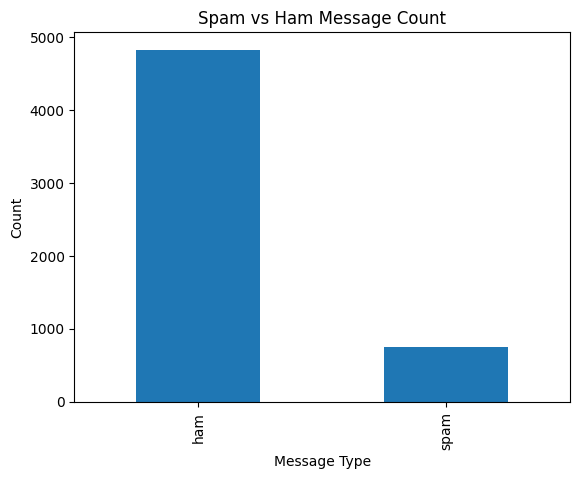

Accuracy: 0.97847533632287


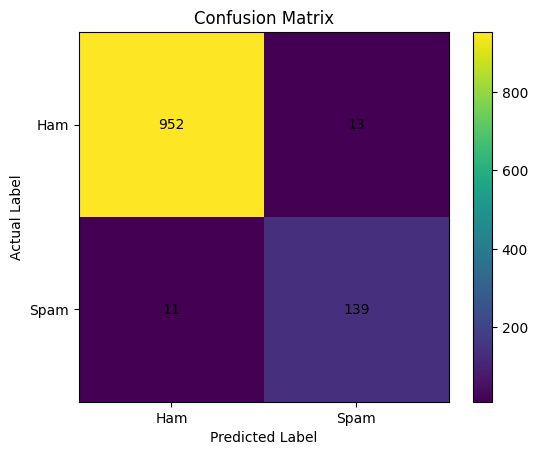

CSV saved as naive_bayes_results.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Message Count")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


X = df['message']
y = df['label_encoded']


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

plt.xticks([0, 1], ['Ham', 'Spam'])
plt.yticks([0, 1], ['Ham', 'Spam'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


results = pd.DataFrame({
    "Actual_Label": y_test.map({0: "Ham", 1: "Spam"}),
    "Predicted_Label": pd.Series(y_pred).map({0: "Ham", 1: "Spam"})
})

results.to_csv("naive_bayes_results.csv", index=False)
print("CSV saved as naive_bayes_results.csv")
